In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd

# File path
file_path = '/content/drive/MyDrive/Datasets/Sample - Superstore.csv'

# Loading the data
df = pd.read_csv(file_path,encoding='latin1')

# Preview the first few rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [10]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [11]:
#Cleaning and preparing data
1. #converting dates columns into needed datatype
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [72]:
2.#adding some new Columns for analysis
 # Shipping duration
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

# Month-Year for time series
df['Month-Year'] = df['Order Date'].dt.to_period('M').astype(str)

#preview the changes
df[['Order Date', 'Ship Date', 'Shipping Duration', 'Month-Year']].head()



,Order Date,Ship Date,Shipping Duration,Month-Year
0,2016-11-08,2016-11-11,3,2016-11
1,2016-11-08,2016-11-11,3,2016-11
2,2016-06-12,2016-06-16,4,2016-06
3,2015-10-11,2015-10-18,7,2015-10
4,2015-10-11,2015-10-18,7,2015-10


In [ ]:
#Explanatory data analysis


In [ ]:
#Section-1 (Basic Exploration)

In [17]:
# 1.How many unique cities, states, and customers are in the dataset?
unique_cities=df['City'].nunique()
unique_states=df['State'].nunique()
unique_customers=df['Customer ID'].nunique()

print(f"Number of unique cities: {unique_cities}")
print(f"Number of unique states: {unique_states}")
print(f"Number of unique customers: {unique_customers}")

Number of unique cities: 531
Number of unique states: 49
Number of unique customers: 793


In [18]:
# 2.What is the distribution of orders across segments (Consumer, Corporate, Home Office)?
Segment_dist=df['Segment'].value_counts()
print(f"Distribution of orders across segments:\n{Segment_dist}")

Distribution of orders across segments:
Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64


In [20]:
# 3. Which shipping mode is most frequently used?
mode_shipping=df['Ship Mode'].value_counts().idxmax()
print(f"The most frequently used shipping mode is: {mode_shipping}")

The most frequently used shipping mode is: Standard Class


In [22]:
#4. What’s the average shipping duration across all orders?
average_shipping_duration=df['Shipping Duration'].mean().round(0)
print(f"The average shipping duration across all orders is: {average_shipping_duration} days")

The average shipping duration across all orders is: 4.0 days


In [ ]:
# Section-2 Category & Sales Performance (Business Basics)

In [35]:
# 1.What are the top 5 sub-categories by sales and profit?
df.groupby("Sub-Category", as_index=False)["Sales"].sum().sort_values(by="Sales", ascending=False).head(5)




,Sub-Category,Sales
13,Phones,330007.054
5,Chairs,328449.103
14,Storage,223843.608
16,Tables,206965.532
3,Binders,203412.733


In [ ]:
df.groupby("Sub-Category", as_index=False)["Profit"].sum().sort_values(by="Profit", ascending=False).head(5)



In [38]:
# 2. Which categories or sub-categories are generating losses despite high sales?
df.groupby("Sub-Category", as_index=False)[["Sales","Profit"]].sum().sort_values(by="Profit", ascending=True).head(5)

,Sub-Category,Sales,Profit
16,Tables,206965.5320,-17725.4811
4,Bookcases,114879.9963,-3472.5560
15,Supplies,46673.5380,-1189.0995
8,Fasteners,3024.2800,949.5182
11,Machines,189238.6310,3384.7569


In [39]:
df.groupby("Category", as_index=False)[["Sales","Profit"]].sum().sort_values(by="Profit", ascending=True).head(5)

,Category,Sales,Profit
0,Furniture,741999.7953,18451.2728
1,Office Supplies,719047.0320,122490.8008
2,Technology,836154.0330,145454.9481


In [44]:
#3.What is the profit margin (profit/sales) for each category and sub-category?
# Step 1: Calculation of Profit Margin %
df["Profit Margin"] = (df["Profit"] / df["Sales"]) * 100

# Step 2: Group by Category & Sub-Category
margin_df = df.groupby(["Category", "Sub-Category"], as_index=False)[["Sales", "Profit"]].sum()

# Step 3: Calculate Margin on grouped totals
margin_df["Profit Margin (%)"] = (margin_df["Profit"] / margin_df["Sales"]) * 100

# Step 4: View
margin_df.sort_values(by="Profit Margin (%)", ascending=False)


,Category,Sub-Category,Sales,Profit,Profit Margin (%)
9,Office Supplies,Labels,12486.3120,5546.2540,44.418672
10,Office Supplies,Paper,78479.2060,34053.5693,43.391837
7,Office Supplies,Envelopes,16476.4020,6964.1767,42.267582
14,Technology,Copiers,149528.0300,55617.8249,37.195585
8,Office Supplies,Fasteners,3024.2800,949.5182,31.396504
13,Technology,Accessories,167380.3180,41936.6357,25.054700
5,Office Supplies,Art,27118.7920,6527.7870,24.071083
4,Office Supplies,Appliances,107532.1610,18138.0054,16.867517
6,Office Supplies,Binders,203412.7330,30221.7633,14.857361
2,Furniture,Furnishings,91705.1640,13059.1436,14.240358


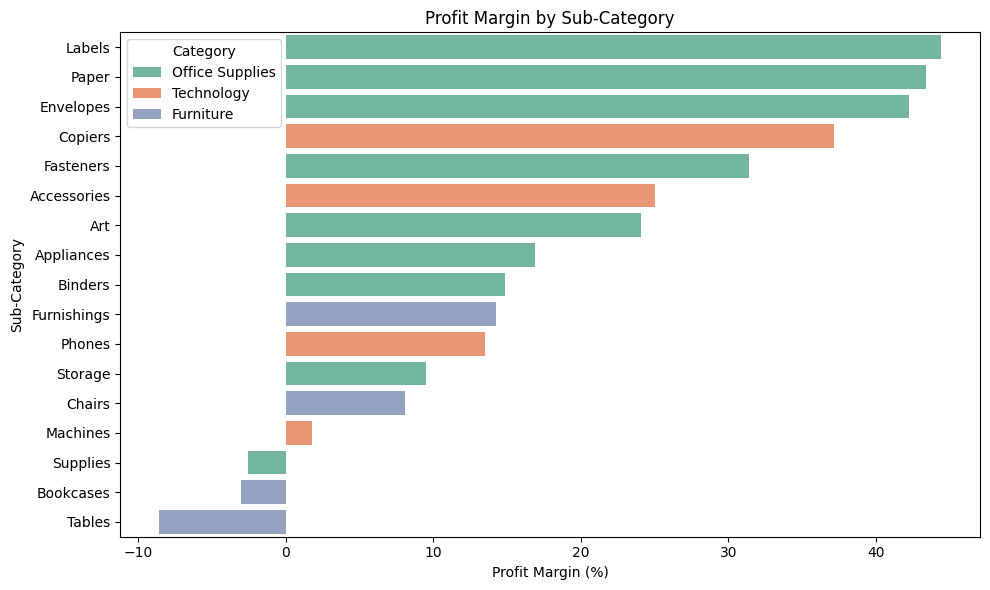

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=margin_df.sort_values(by="Profit Margin (%)", ascending=False),
            y="Sub-Category", x="Profit Margin (%)", hue="Category", palette="Set2")
plt.title("Profit Margin by Sub-Category")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.show()


In [ ]:
#Section:3 Regionwise analysis

In [54]:
#1. Which regions and states contribute the most to sales and profit?
region=df.groupby("Region", as_index=False)["Sales"].sum().sort_values(by="Sales", ascending=False)
print(region)


    Region        Sales
3     West  725457.8245
1     East  678781.2400
0  Central  501239.8908
2    South  391721.9050


([<matplotlib.patches.Wedge at 0x7e9036f6b090>,
 [Text(0.6016102141174363, 0.9209045283141856, 'West'),
  Text(-1.071264814694645, 0.2497832996764359, 'East'),
  Text(-0.20353453450653666, -1.0810058710586208, 'Central'),
  Text(0.9458980490374992, -0.56149521888174, 'South')],
 [Text(0.328151025882238, 0.5023115608986466, '31.6%'),
  Text(-0.5843262625607154, 0.13624543618714682, '29.5%'),
  Text(-0.11101883700356543, -0.589639566031975, '21.8%'),
  Text(0.5159443903840903, -0.30627011939003995, '17.1%')])

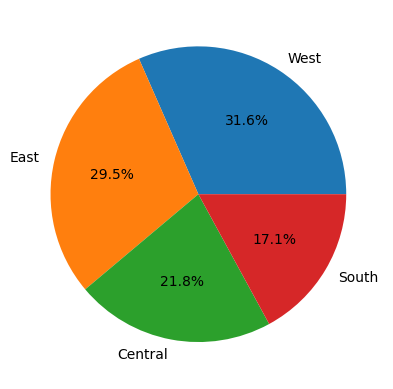

In [55]:
plt.pie(region["Sales"], labels=region["Region"], autopct='%1.1f%%')

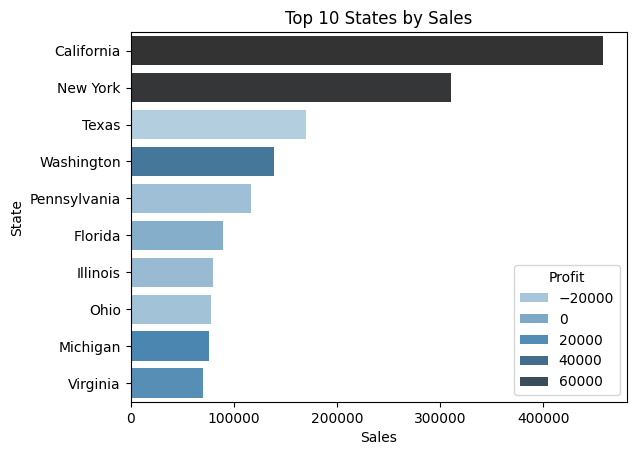

In [57]:
top_states = df.groupby("State", as_index=False)[["Sales", "Profit"]].sum()
top_states = top_states.sort_values(by="Sales", ascending=False).head(10)

sns.barplot(data=top_states, x="Sales", y="State",hue="Profit", palette="Blues_d")
plt.title("Top 10 States by Sales")
plt.show()


<ipython-input-58-3340019450>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_profit_states, y="State", x="Profit", palette="crest")


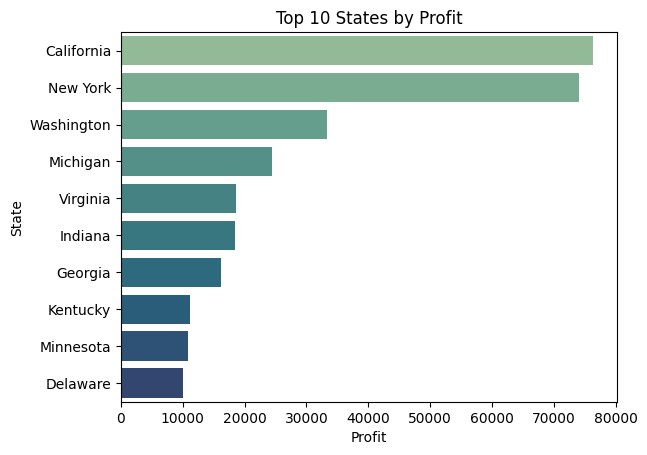

<ipython-input-58-3340019450>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_profit_states, y="State", x="Profit", palette="flare")


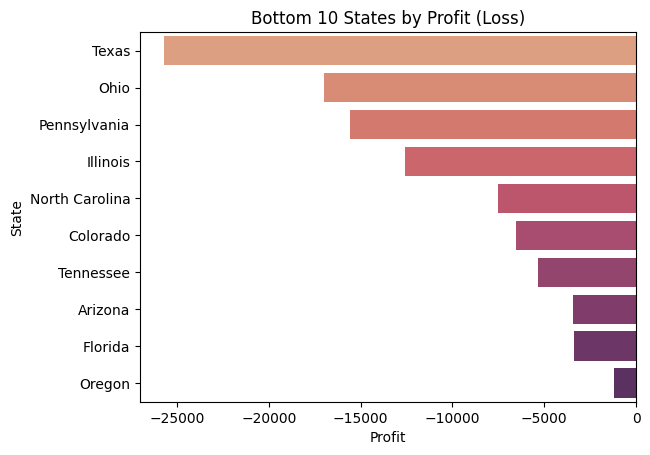

In [58]:
#2 Top States by Profit and Loss
state_profit = df.groupby("State", as_index=False)["Profit"].sum()

# Top 10 profitable states
top_profit_states = state_profit.sort_values(by="Profit", ascending=False).head(10)
sns.barplot(data=top_profit_states, y="State", x="Profit", palette="crest")
plt.title("Top 10 States by Profit")
plt.show()

# Bottom 10 (losses)
bottom_profit_states = state_profit.sort_values(by="Profit", ascending=True).head(10)
sns.barplot(data=bottom_profit_states, y="State", x="Profit", palette="flare")
plt.title("Bottom 10 States by Profit (Loss)")
plt.show()


In [ ]:
#4 Shipping Performance Analysis

In [63]:
#1. Q5. How does shipping mode impact delivery time and profitability?
ship_analysis = df.groupby("Ship Mode", as_index=False).agg({
    "Shipping Duration": "mean",
    "Sales": "sum",
    "Profit": "sum",
    "Order ID": "count"
})
ship_analysis.rename(columns={"Order ID": "Order Count"}, inplace=True)
ship_analysis = ship_analysis.sort_values(by="Shipping Duration", ascending=True)
print(ship_analysis)


        Ship Mode  Shipping Duration         Sales       Profit  Order Count
1        Same Day           0.044199  1.283631e+05   15891.7589          543
0     First Class           2.182705  3.514284e+05   48969.8399         1538
2    Second Class           3.238046  4.591936e+05   57446.6354         1945
3  Standard Class           5.006535  1.358216e+06  164088.7875         5968


<ipython-input-64-3541676255>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ship_analysis, x="Ship Mode", y="Shipping Duration", palette="coolwarm")


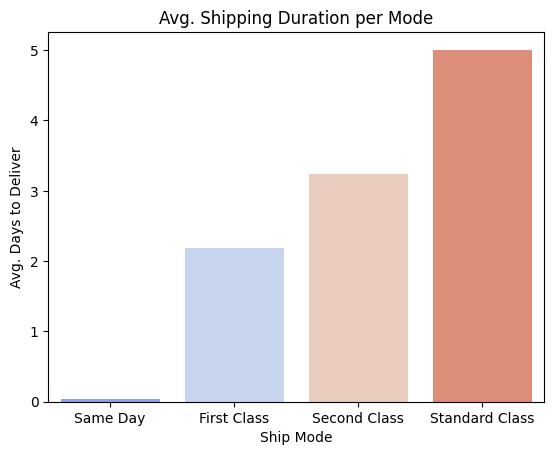

In [64]:
sns.barplot(data=ship_analysis, x="Ship Mode", y="Shipping Duration", palette="coolwarm")
plt.title("Avg. Shipping Duration per Mode")
plt.ylabel("Avg. Days to Deliver")
plt.show()


In [74]:
# Time-Based Sales & Profit Trends
monthly_trend = df.groupby("Month-Year", as_index=False)[["Sales", "Profit"]].sum()
print(monthly_trend)

   Month-Year        Sales      Profit
0     2014-01   14236.8950   2450.1907
1     2014-02    4519.8920    862.3084
2     2014-03   55691.0090    498.7299
3     2014-04   28295.3450   3488.8352
4     2014-05   23648.2870   2738.7096
5     2014-06   34595.1276   4976.5244
6     2014-07   33946.3930   -841.4826
7     2014-08   27909.4685   5318.1050
8     2014-09   81777.3508   8328.0994
9     2014-10   31453.3930   3448.2573
10    2014-11   78628.7167   9292.1269
11    2014-12   69545.6205   8983.5699
12    2015-01   18174.0756  -3281.0070
13    2015-02   11951.4110   2813.8508
14    2015-03   38726.2520   9732.0978
15    2015-04   34195.2085   4187.4962
16    2015-05   30131.6865   4667.8690
17    2015-06   24797.2920   3335.5572
18    2015-07   28765.3250   3288.6483
19    2015-08   36898.3322   5355.8084
20    2015-09   64595.9180   8209.1627
21    2015-10   31404.9235   2817.3660
22    2015-11   75972.5635  12474.7884
23    2015-12   74919.5212   8016.9659
24    2016-01   18542.491

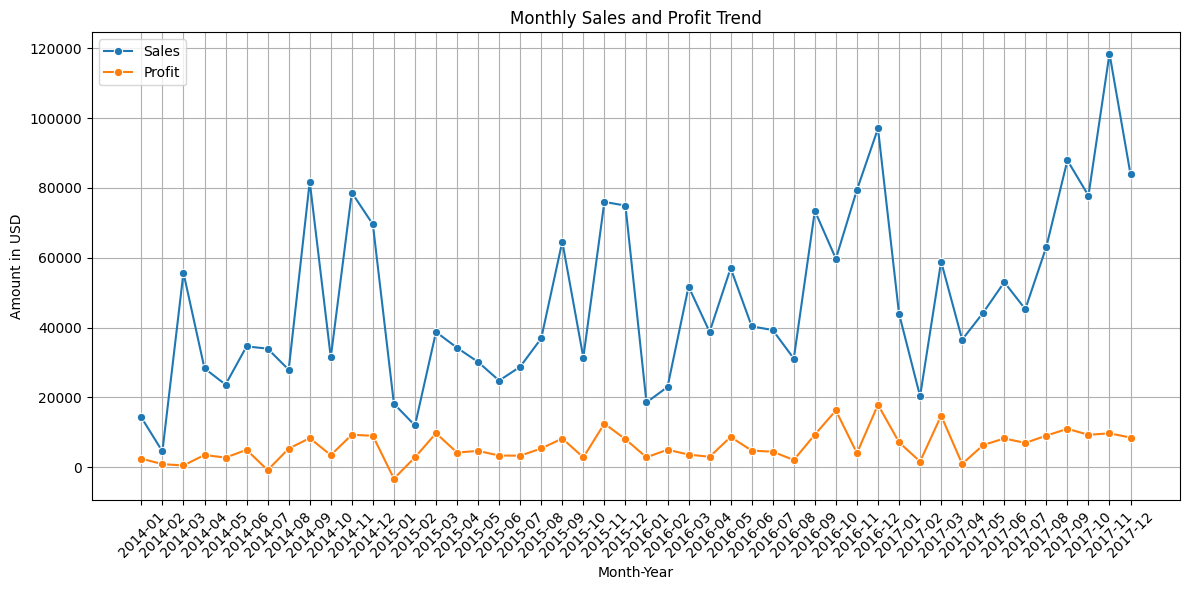

In [75]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_trend, x="Month-Year", y="Sales", label="Sales", marker="o")
sns.lineplot(data=monthly_trend, x="Month-Year", y="Profit", label="Profit", marker="o")
plt.title("Monthly Sales and Profit Trend")
plt.ylabel("Amount in USD")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [76]:
# Does giving more discounts increase or decrease profit?
discount_analysis = df.groupby("Discount", as_index=False)["Profit"].sum()
print(discount_analysis)

    Discount       Profit
0       0.00  320987.6032
1       0.10    9029.1770
2       0.15    1418.9915
3       0.20   90337.3060
4       0.30  -10369.2774
5       0.32   -2391.1377
6       0.40  -23057.0504
7       0.45   -2493.1111
8       0.50  -20506.4281
9       0.60   -5944.6552
10      0.70  -40075.3569
11      0.80  -30539.0392


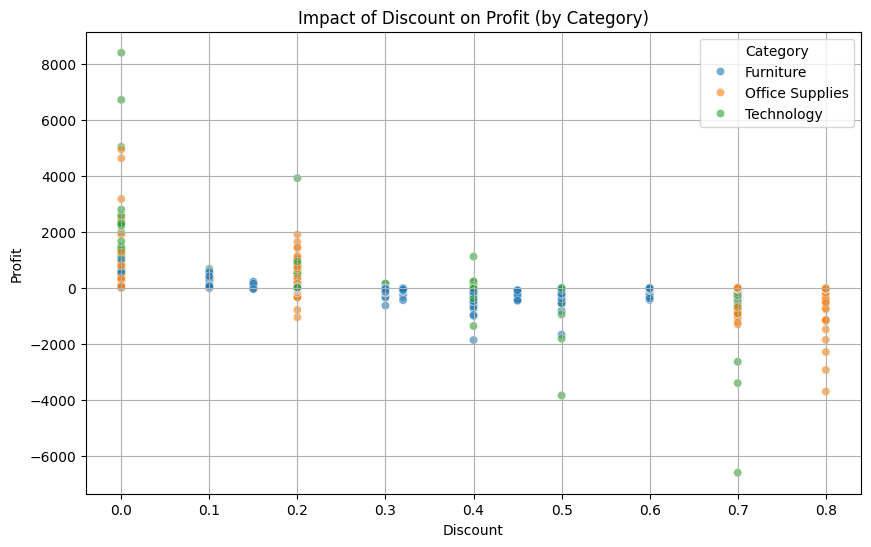

In [77]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Discount", y="Profit", hue="Category", alpha=0.6)
plt.title("Impact of Discount on Profit (by Category)")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.show()


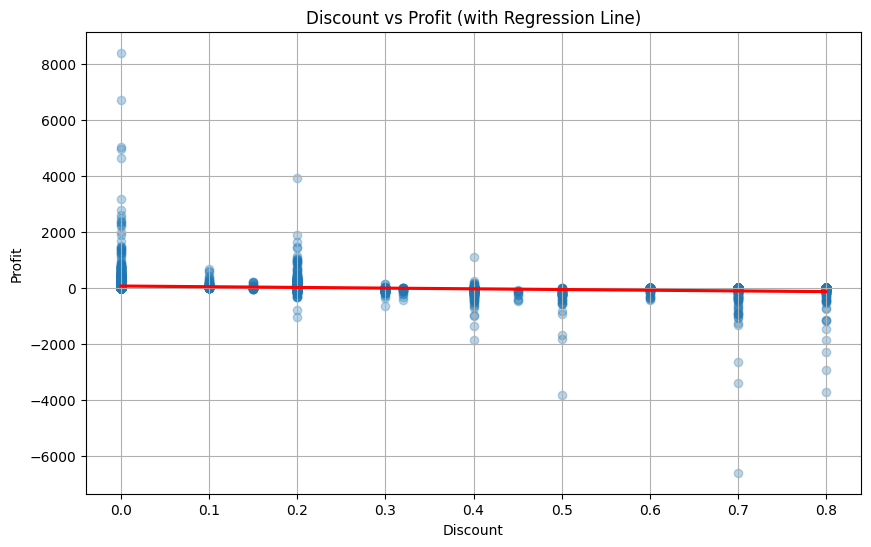

In [78]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x="Discount", y="Profit", scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
plt.title("Discount vs Profit (with Regression Line)")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.show()


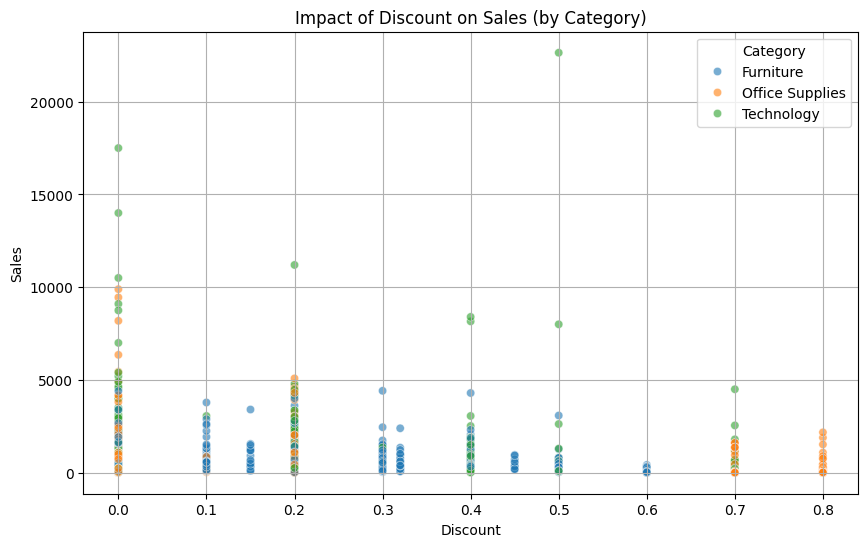

In [79]:
# Do Higher Discounts Increase Sales?
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Discount", y="Sales", hue="Category", alpha=0.6)
plt.title("Impact of Discount on Sales (by Category)")
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.grid(True)
plt.show()
